In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

## Load the dataset and replace nans

In [2]:
df = pd.read_csv('../Datasets/Breast_cancer_wisconsin.csv').replace('?',np.nan)
df = df.fillna(df.median())

## Explore the dataset

In [3]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
df.shape

(699, 10)

In [5]:
colnames = df.columns.values
colnames

array(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'], dtype=object)

In [6]:
df['class'].unique()

array([0, 1])

In [7]:
df['class'].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: class, dtype: float64

In [8]:
df.corr()['class'].abs().sort_values(ascending=False)

class                1.000000
shape_uniformity     0.818934
size_uniformity      0.817904
bland_chromatin      0.756616
clump_thickness      0.716001
normal_nucleoli      0.712244
marginal_adhesion    0.696800
epithelial_size      0.682785
mitoses              0.423170
Name: class, dtype: float64

In [9]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Select the features

In [10]:
x = df[colnames[0:9]]
y = df[colnames[9]]

## Split into train and test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

## Scale the features

In [12]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Hyperparameter optimization with cross-validation

In [13]:
estimator = LogisticRegression(penalty='l2')

parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)}

grid_search = GridSearchCV(estimator, parameters, cv =5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [14]:
grid_search.best_score_

0.95763807645202437

In [15]:
grid_search.best_params_

{'C': 0.01}

## Make predictions using the best model

In [16]:
model = grid_search.best_estimator_
#model.fit(x_train, y_train)

In [17]:
y_pred = model.predict(x_test)

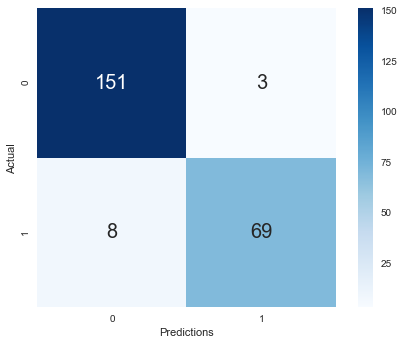

In [18]:
table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})
plt.show()

## Evaluate the model

In [19]:
model.score(x_test,y_test) #Accuracy

0.95238095238095233

In [20]:
f1_score(y_test,y_pred)

0.92617449664429519